# Classification
    
En este capítulo vamos a utilizar el dataset llamado MNIST. Este dataset contiene 70.000 pequeñas imágenes de digitos escritos a mano por estudiantes de secundaria y por trabajadores de la oficina del censo de los estados unidos. Cada imagen está etiquetada con el dígito que represnta.
Este dataset es muy famoso, es como el "hello world" de la clasificación, y cuando alguien desarrolla algún algoritmo de clasificación, siente curiosidad por ver cómo se comprta el algoritmo de clasificación sobre este conjunto de datos.

Scikit-Learn proporciona algunas funciones de ayuda que permiten descargar algunos datasets famosos, incluido este. El siguiente código nos va a ayudar a descargar este conjunto de datos

In [21]:
# El proyecto requiere una versión de python 3.7 o superior
import sys

assert sys.version_info >= (3, 7)

In [22]:
# Verificar que la versión de scikit-learn es al menos la 1.0.1
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [23]:
# Configuración de Matplotlib, para mejorar la legibilidad de los gráficos
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [24]:
# Función para guardar las figuras generadas, en una carpeta específica.
# Las figuras se guardan en formato PNG con una resolución de 300 dpi.
from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

El paquete sklearn.dataset contiene principalmente tres tipos de funciones:

-fetch_*: para descargar conjuntos de datos reales
-load_*: para cargar pqueños conjuntos de prueba incluidos en el paquete sin necesidad de utilizar internet
-make_*: para generar conjuntos de datos para probar

Ahora, en el momento del desarrollo de este cuaderno, OpenML presenta problemas para descargar el dataset, por lo que se descarga desde tendsorflow

In [25]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [26]:
# extra code – it's a bit too long
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

En general, los conjuntos de datos se devuelven como una tupla (X,y) que contienen los datos de entraga y los datos objetivo (input, target), ambos como arrays numPy.

In [27]:
mnist.keys()  # extra code – we only use data and target in this notebook

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [28]:
X, y = mnist.data, mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [29]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [30]:
X.shape

(70000, 784)

In [31]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [32]:
y.shape

(70000,)

In [33]:
28*28

784

Hay 70.000 imagenes y cada imagen tiene 784 features (caracteristicas). esto es así porque cada imagen tiene 28x28 pixeles, y cada caracteristica represetna la intensidad de cada uno de los pixeles de la imagen (de 0 a 255, de blanco a negro)

Echemos un vistazo a una de las cifras del conjunto de datos. Todo lo que necesitamos hacer es tomar el vector de características de una instancia, reformarlo a un arreglo de 28 × 28 y mostrarlo usando la función `imshow()` de Matplotlib. Usamos `cmap="binary"` para obtener un mapa de colores en escala de grises donde 0 es blanco y 255 es negro.


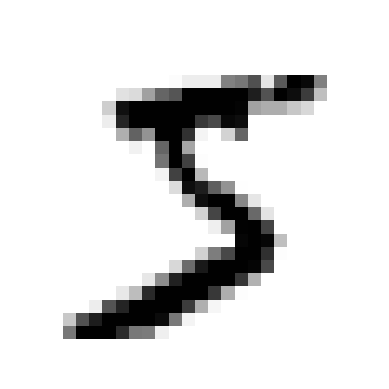

In [34]:
import matplotlib.pyplot as plt 

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap='binary')
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [35]:
y[0]

'5'

Para dar una idea de la complejidad de la tarea de clasificacion, vamos a mostrar algunas imagenes adicionales del conjunto de datos de MNIST. Pero antes, importante, siempre debes crear un conjunto de datos de test y apartarlo desde el inicio antes de revisar los datos con mas detenimiento, para prevenir sesgos. 

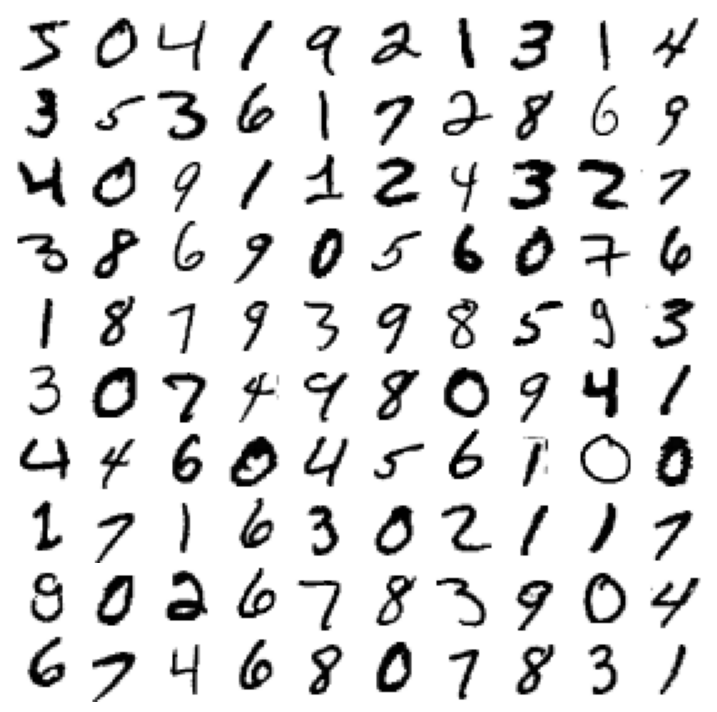

In [36]:
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
save_fig("more_digits_plot", tight_layout=False)
plt.show()

El conjunto de datos MNIST ya viene dividido en conjunto de entrenamiento (60.000 primeras muestras) y conjunto de prueba o test set (últimas 10.000 muestras), con lo cual:

In [37]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

El conjunto de entrenamiento ya está barajado por nosotros, lo cual es bueno porque garantiza que todos los pliegues de la validación cruzada serán similares (no queremos que a un pliegue le falten algunos dígitos). Además, algunos algoritmos de aprendizaje son sensibles al orden de las instancias de entrenamiento y tienen un rendimiento deficiente si reciben muchas instancias similares seguidas. Barajar el conjunto de datos asegura que esto no ocurra.

## Entrenar un clasificador binario

Por ahora, vamos a simplificar el problema y vamos a intentar identificar un único dígito, el dígito '5'. este detector de '5' será un ejemplo de un clasificador binario, capaz de detectar el número '5' y detectar lo que no es el número '5' (de ahí lo de clasificador binario).

primero, crearemos los vectores objetivo para esta tarea de clasificacion:

In [38]:
y_train_5 = (y_train == '5')  # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')

Vamos ahora a coger algun clasificador y entrenarlo. un clasificador interesante para comenzar es el clasificdor SGD (stochastic gradient descent) o clasificador de descenso de gradiente estocastico usando la clase SGDClassifier. este clasificador es capaz de manejar conjuntos de datos muy grandes de manera muy eficiente. esto es en parte porque trata las muestras de entrenamiento de manera individual, lo que tambien lo hace adecuado para el online learning.

creeemos entonces un SGDC y entrenemoslo sobre todo el conjunto de entrenamiento:

In [39]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


Ahora ya lo podemos usar para detectar imagenes del número 5

In [40]:
sgd_clf.predict([some_digit])

array([ True])

El clasificador indica que esta imagen podría representar el '5'. parece que en este caso lo ha hecho bien. vamos ahora a evaluar el rendimiento de este modelo.

## Medidas de rendimiento

Evaluar un clasificador suele ser significativamente más complicado que evaluar un regresor, así que dedicaremos algo de tiempo a este tema. Existen muchas medidas de rendimiento disponibles, así que vamos a aprender un montón de conceptos y siglas nuevas.

## Midiendo la precisión usando la validación cruzada

Una buena forma de evaluar un clasificador es utilizar la validación cruzada. Usemos ahora la función cross_val_score() para evaluar nuestro modelo SGDClassifier usando validación cruzada de k pliegues (k-fold cross-validation) con tres pliegues.
recordemos que la validación cruzada de k pliegues quiere decir que dividimos el conjunto de entrenamiento k veces, en este caso 3, luego entrenar el modelo k veces, dejando fuera un pliegue diferente cada vez para la evaluacion

In [41]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

¡Vaya! ¿Más del 95% de exactitud (proporción de predicciones correctas) en todos los pliegues de la validación cruzada? Esto luce increíble, ¿verdad? Bueno, antes de emocionarte demasiado, veamos un clasificador ficticio (dummy) que simplemente clasifica cada imagen en la clase más frecuente, que en este caso es la clase negativa (es decir, “no 5”):

In [42]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)  # add shuffle=True if the dataset is not
                                       # already shuffled
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.95035
0.96035
0.9604


¿podrás predecir la precisión de este modelo? veamoslo

In [43]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [44]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

Así es, ¡tiene más del 90% de exactitud! Esto se debe simplemente a que solo alrededor del 10% de las imágenes son cincos, así que si siempre supones que una imagen no es un 5, acertarás aproximadamente el 90% de las veces.
esto demuestra por qué la precision no es un indicador muy interesante cuando hablamos de clasificadores, especialmente cuanto estas trabajando con conjuntos de datos sesgados o desbalanceados.
otra manera mucho mejor y mas preferida de evaluar la precision de un clasificador es usar la matriz de confusion (CM)

## Matrices de confusión

La idea general de las matrices de confusión es contar el numero de veces que las instancias de la clase A son clasificadas como de clase B, para todos los pares A/B. por ejemplo, para conocer el número de veces que el clasificador confunde las imagenes de '8' como imagenes de '0', habría que mirar la fila 8 en la columna 0 de la matriz de confusion. 

para calcular la matrix de confusion, lo primero que necesitamos es una serie de predicciones para poder comparar con los targets. podemos hacer predicciones sobre el conjunto de test, pero es mejor dejar este conjunto sin tocar de momento (la idea es usar este conjunto muy al final de nuestro proyecto, en cuanto tengamos un clasificador listo para lanzar a produccion). en cambio, lo que podemos hacer es usar la funcion cross_val_redict()

In [45]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)


Al igual que la función cross_val_score(), cross_val_predict() realiza validación cruzada k-fold, pero en lugar de devolver las puntuaciones de evaluación, devuelve las predicciones realizadas en cada pliegue de prueba. Esto significa que obtienes una predicción “limpia” para cada instancia del conjunto de entrenamiento (por “limpia” me refiero a “fuera de muestra”: el modelo hace predicciones sobre datos que nunca vio durante el entrenamiento).
Ahora estás listo para obtener la matriz de confusión usando la función confusion_matrix(). Solo pásale las clases objetivo (y_train_5) y las clases predichas (y_train_pred):

In [46]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [47]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

cada fila de una matriz de confusion representa una clase concreta, mientras que cada columna representa una clase predicha. la primera fila de esta matriz considera las clases que no son '5' (la clase negativa). 53.822 fueron corretcamente clasificados como no '5', (esto se conoce como true-negatives) mientras que los otros 757 fueron clasificados incorrectamente como '5' (falsos positivos, o tambien llamados errores de tipo 1)
la segunda fila contiene la clase de los '5', la clase positiva. 867 fueron clasificados erroneamente como no '5', (faslos negativos, o errores de tipo 2), mientras que los otros 4.554 fueron correctamente clasificados como '5' (true-positives).

un clasificador perfecto tendría unicamente true-positives y true-negatives, por lo que solo tendria valores distintos de cero en su diagonal principal.

la matriz de confusion nos da mucha informacion, pero a veces podemos llegar a preferir una metrica mas concisa. una interesante es ver la precision de las predicciones positivas, esta se llama la precision del classificador. 

precision = TP / TP+FP

**TP es el número de verdaderos positivos y FP es el número de falsos positivos.
Una manera trivial de tener una precisión perfecta es crear un clasificador que siempre haga predicciones negativas, excepto por una sola predicción positiva sobre la instancia en la que tiene más confianza. Si esta única predicción es correcta, entonces el clasificador tiene un 100% de precisión (precisión = 1/1 = 100%). Obviamente, un clasificador así no sería muy útil, ya que ignoraría todas las instancias positivas excepto una.

Por eso, la precisión generalmente se usa junto con otra métrica llamada recall, también conocida como sensibilidad o tasa de verdaderos positivos (TPR): esta es la proporción de instancias positivas que son correctamente detectadas por el clasificador (Ecuación 3-2).

Ecuación 3-2. Recall

\text{recall} = \frac{TP}{TP + FN} \]**

Un clasificador con **precisión perfecta** puede ser *trivial* porque puede obtenerse sin realmente “saber” clasificar bien. Veamos por qué.

---

# ✅ ¿Qué significa tener precisión perfecta?

La **precisión** (*precision*) mide:

[
\text{precisión} = \frac{TP}{TP + FP}
]

Es decir: *de todas las predicciones positivas que hizo el modelo, cuántas fueron correctas*.

---

# ✅ ¿Cómo se obtiene una precisión perfecta de manera trivial?

Imagina que un modelo **siempre predice "negativo"**, excepto *una vez*, cuando está muy seguro, y predice "positivo".

Si justo esa única predicción positiva es correcta:

* TP = 1 (acertó la única predicción positiva)
* FP = 0 (no cometió ningún falso positivo)

Entonces:

[
\text{precisión} = \frac{1}{1 + 0} = 1 = 100%
]

¡Listo! El modelo tiene **precisión perfecta**.

Pero lo hizo sin realmente clasificar bien. Solo dijo "NO" a casi todo.


## Precisión y sensibilidad

scikit-learn proporciona una serie de funciones para calcular metricas de clasificacion, incluyendo la precision y la sensibilidad


In [48]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)  # == 3530 / (687 + 3530)

0.8370879772350012

In [49]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [50]:
# extra code – this cell also computes the precision: TP / (FP + TP)
cm[1, 1] / (cm[0, 1] + cm[1, 1])

0.8370879772350012

Ahora nuestro detector de '5' no luce tan bien como antes cuando mirabamos la precision. cuando el clasificador indica que la imagen es un '5', es correcto solo el 85,7% de las veces, ademas, solo detecta el 84,0% de los ''5'

a veces es conveniente combinar estas dos metricas de precision y sensibilidad en una sola metrica llamada puntuacion F1, especialmente cuando necesitas una unica sola metrica para comparar un clasificador. 

la puntuacion F1 es la media armónica de la precision y la sensibilidad

nota: La media armónica (designada usualmente mediante H) de una cantidad finita de números es igual al recíproco, o inverso, de la media aritmética de los recíprocos de dichos valores y es recomendada para promediar velocidades.

Así, dados n números x1, x2, ... , xn la media armónica será igual a:

{\displaystyle {H}={\frac {n}{\sum _{i=1}^{n}{\cfrac {1}{x_{i}}}}}={\frac {n}{{\cfrac {1}{x_{1}}}+\cdots +{\cfrac {1}{x_{n}}}}}}

La media armónica resulta poco influida por la existencia de determinados valores mucho más grandes que el conjunto de los otros, siendo en cambio sensible a valores mucho más pequeños que el conjunto.

La media armónica no está definida en el caso de que exista algún valor nulo.

donde la media aritmetica trata a todos los valores por igual, la media armonica le da mas peso a los valores mas pequeños, como resultado, la puntuacion f1 será alta solo si la precision y la sensibilidad sean altas las dos. para calcular la puntuacion F1 usemos solo la funcion f1_score()

In [51]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343847

In [52]:
# extra code – this cell also computes the f1 score
cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)

0.7325171197343847

la puntuacion f1 favorece a los clasificadores que tienen valores de precision y sensibilidad similiraes. algunas veces esto no es realmente lo que queremos, ya que en algunos contextos nos interesará una precision alta, pero en otras nos interesará una sensibilidad alta. por desgracia, no vas a poder tener esto en ambos sentidos, incrementar la precision reducira la sensibilidad, e incrementar la sensiblidad reducirá la precision. esto se llama precision/recall trade off

## El compromiso entre la precision y la sensibilidad 

para entender este compromiso, echemos un vistazo a cómo el clasificador SGDClassifier hace la decisión de clasificacion. para cada decisión, calcula una puntuacion basada en una decision de clasificacion. si esa puntuacion es superior a un umbral, asigna la instancia a la clase positiva. en caso contrario, la asigna a la clase negativa. scikit-learn no permite establecer el umbral directamente, pero si nos da acceso a las puntuaciones de decision que utiliza para hacer las predicciones. en lugar de llamar al metodo predict() del clasifciador, podemos llamar al metodo decision_function(), que devuelve una puntuación para cada instancia, y ahi podemos usar el umbral que queramos para hacer predicciones basadas en esas puntuaciones. 

In [53]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [54]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [55]:
y_scores > 0

array([ True])

In [56]:
y_some_digit_pred

array([ True])

In [57]:
# extra code – just shows that y_scores > 0 produces the same result as
#              calling predict()
y_scores > 0

array([ True])

el SGDClassifier usa un umbral de cero, por lo que el codigo anterior devuelve el mismo resultado que el metodo predict(). Aumentemos el umbral:

In [58]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

esto confirma que aumentar el umbral reduce la sensibilidad (recall). la imagen realmente represetna el dígito '5', y el clasificador lo detecta cuando elumbral es cero, pero se equivoca cuando el umbral se aumenta a 3000. ¿como podemos decidir qué umbral utilizar? Bueno, primero habría que utilizar la funcion cross_val_predcit() para obtener la puntuacion de todas las instancias del conjunto de datos de entrenamiento, pero esta vez indicamos que queremos obtener las puntuaciones de decision, en lugar de las predicciones

In [59]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

con estas puntaciones, utilizamos la funcion precision_recall_curve() para calcular la precision y la sensibilidad para todos los posibles umbrales (la función añade una última precisión de 0 y un último recall de 1, correspondientes a un umbral infinito):

In [60]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

finalmente, y usando matplotlib para graficar la curva de precision/sensibilidad como funciones del valor del umbral. veamos con el umbral de 3000 de antes

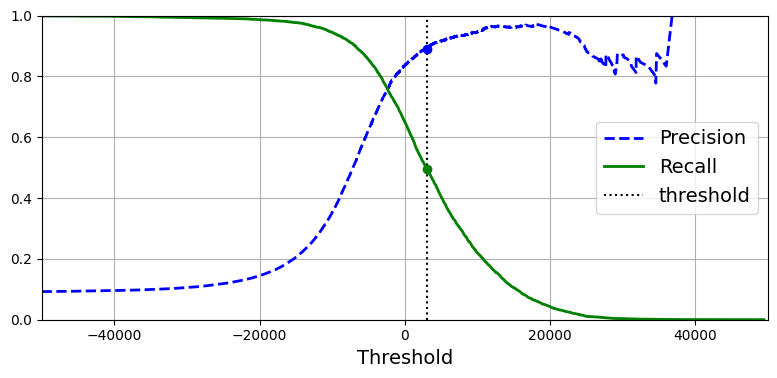

In [61]:
plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# extra code – this section just beautifies and saves Figure 3–5
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
save_fig("precision_recall_vs_threshold_plot")

plt.show()

NOTA
Puede que te preguntes por qué la curva de precisión es más irregular que la curva de recall. La razón es que la precisión a veces puede disminuir cuando aumentas el umbral (aunque en general tiende a subir). Por otro lado, el recall solo puede disminuir cuando el umbral aumenta, lo que explica por qué su curva se ve suave.

a este valor de umbral (3000) la precision esta cerca del 90% y la sensibilidad está sobre el 50%. otra forma de elegir un buen umbral para este 'trade-off' entre la precision y la sensibilidad es graficar la precision directamente contra la sensibilidad.

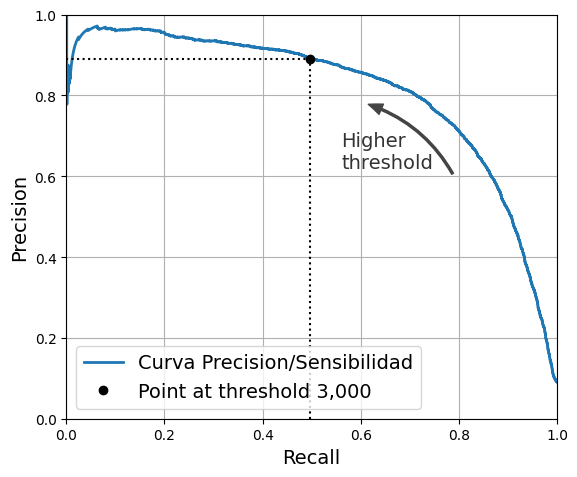

In [62]:
import matplotlib.patches as patches  # extra code – for the curved arrow

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls, precisions, linewidth=2, label="Curva Precision/Sensibilidad")

# extra code – just beautifies and saves Figure 3–6
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
save_fig("precision_vs_recall_plot")

plt.show()

se puede ver que la precision realmemten cae abruptamente mas o menos al 80% de la sensibilidad. la decision del umbral dependerá del proyecto, por supeusto. supongamos que queremos un 90% de precisioni. podemos usar el primer plot que hicimos antes para encontrar el umbral que queremos usar, pero no es muy preciso. de forma alternativa, podemos buscar el umbral mas pequeño para el cual obtenemos una precision del 90%. para esto, podemos usar el metodo argmax() de NumPy. esto devuelve el primer indice del valor maximo, que en este caso significa el primer valor verdadero.

In [63]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439557

para hacer predicciones (de momento sobre el conjunto de datos de entrenamiento), en lugar de llamar al metodo predic() del clasificador, podemos ejecutar el siguiente codigo:

In [64]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

vamos a verificar la precision y la sensibilidad para estas predicciones

In [65]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [66]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.4799852425751706

genial, tenemos un clasificador con una precision del 90%. es facil crear un clasificador con la precisión que queramos. solo debemos aumentar el umbral, y lo tenemos. pero claro, un clasificador con una precision alta no es muy util si la sensibilidad o recall es muy bajo. para muchas aplicaciones, un 48% de sensibilidad no es muy bueno.